# O11 Polarisation durch Reflexion an Glas

Santiago R. , 18.3.2021

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Messwerte

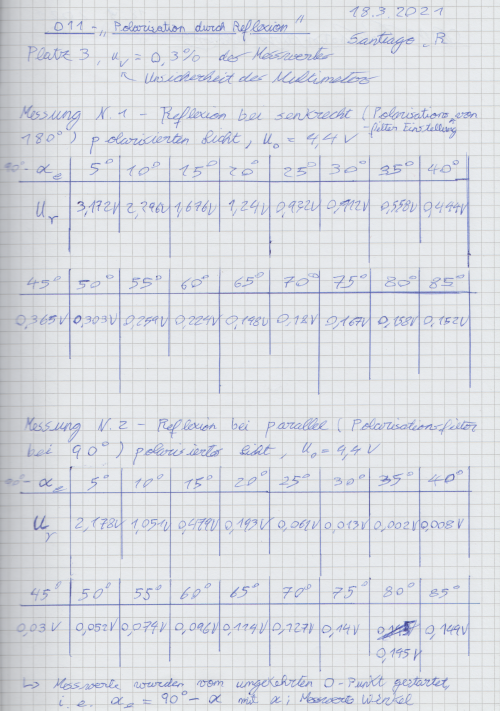

In [78]:
from IPython.display import Image
Image(filename='Messwerte.png', width = 800, height = 300)

In [41]:
#Messwerte
alpha = np.array([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])*2*np.pi/360
U_s = np.array([0.154,0.158,0.167,0.18,0.198,0.224,0.259,0.303,0.365,0.444,0.558,0.712,0.932,1.24, 1.676, 2.296,3.172])
U_s0 = 4.4
U_p = np.array([0.149,0.145,0.14,0.127,0.114,0.096,0.074,0.052,0.03,0.008,0.002,0.013,0.061,0.193,0.479,1.051,2.178])
U_p0 = 4.4
u_Us = U_s*0.01
u_Up = U_p*0.01

# Fits Intensitätsverteilung

Für das Reflexionsvermögen des parallel $R_p$ und senkrecht $R_s$ polarisierten Laserstrahls stellen sich folgende Gleichungen zum Fitten zur Verfügung <br>
$R_s= \frac{sin^2(\alpha _e - \alpha _g)}{sin^2(\alpha _e + \alpha _g)}$ <br>
$R_p= \frac{tan^2(\alpha _e - \alpha _g)}{tan^2(\alpha _e + \alpha _g)}$ <br>
wobei $\alpha _g$ sich aus den Brechungsgesetzen ergibt mit <br>
$\alpha _g = arcsin(\frac{n_1}{n_2} sin(\alpha _e))$


In [42]:
def R_s(alpha_e, n1, n2):
    alpha_g = np.arcsin(n1/n2*np.sin(alpha_e))
    R = np.sin(alpha_e-alpha_g)**2/(np.sin(alpha_e+alpha_g)**2)
    return np.sqrt(R)
def R_p(alpha_e, n1, n2):
    alpha_g = np.arcsin(n1/n2*np.sin(alpha_e))
    R = np.tan(alpha_e-alpha_g)**2/(np.tan(alpha_e+alpha_g)**2)
    return np.sqrt(R)

Zur theoretischen Vorhersage mit $n_1=1$ für die Brechung in Luft und $n_2=1.5$ für die Brechung an Kronglas folgt

/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


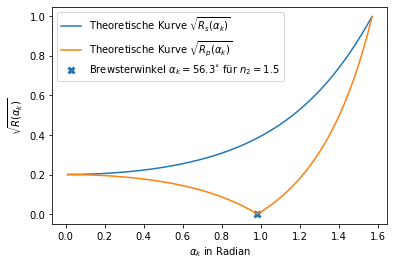

In [43]:
alpha_test = np.arange(0,5/10*np.pi,0.01)
plt.scatter(np.arctan(1.5/1.00028),0, label="Brewsterwinkel "r'$\alpha _k = 56.3 ^{\circ}$'" für "r'$n_2 = 1.5$',marker='x',linewidths=3)
plt.plot(alpha_test,R_s(alpha_test, 1, 1.5), label="Theoretische Kurve "r'$\sqrt{R_s(\alpha _k)}$')
plt.plot(alpha_test,R_p(alpha_test, 1, 1.5), label="Theoretische Kurve "r'$\sqrt{R_p(\alpha _k)}$')
plt.xlabel(r'$\alpha _k$'" in Radian")
plt.ylabel(r'$\sqrt{R(\alpha _k)}$')
plt.legend(loc="upper left")
plt.savefig("TheoryCurves.pdf")

An der Stelle, in dem die Kurve für parallel zur Brennebene polarisiertes Licht nach 0 verläuft, folgt für die Brechzahl $n_2$ des Glases; <br>
$tan(\alpha _e)= \frac{n_2}{n_1} \Leftrightarrow n_2 = n_1 tan(\alpha _e)$ <br>
Mit $n_1 =1.00028$ als die Brechzahl von Luft. Aus den Messwert $R_p(55 ^{\circ}) = 0.002 \approx 0$ folgt dann <br>
$n_2 = 1.00028 \cdot tan(55 ^{\circ}) \approx 1.43$ <br>
Dieser Wert kann dann als Anfangswert für das Fit-Algorithmus verwendet werden

Zum Fitten an die Messwerte gilt zusätzlich <br>
$R(\alpha _e)= \frac{U_r (\alpha _e)}{U_e}$ <br>
s.d. gilt <br>
$ \frac{U_{rs}(\alpha _k)}{U_e}=\frac{sin^2(\alpha _e - \alpha _g)}{sin^2(\alpha _e + \alpha _g)}$ <br>
$ \frac{U_{rp}(\alpha _k)}{U_e} =\frac{tan^2(\alpha _e - \alpha _g)}{tan^2(\alpha _e + \alpha _g)}$ <br>

In [44]:
def U_rs(alpha_e, n2):
    n1 = 1.00028 
    alpha_g = np.arcsin(n1/n2*np.sin(alpha_e))
    U = np.sin(alpha_e-alpha_g)**2/(np.sin(alpha_e+alpha_g)**2)
    return U
def U_rp(alpha_e, n2):
    n1 = 1.00028 
    alpha_g = np.arcsin(n1/n2*np.sin(alpha_e))
    U = np.tan(alpha_e-alpha_g)**2/(np.tan(alpha_e+alpha_g)**2)
    return U

/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


n2 = 1.4595307092297318 +/- 0.0002561748091000629


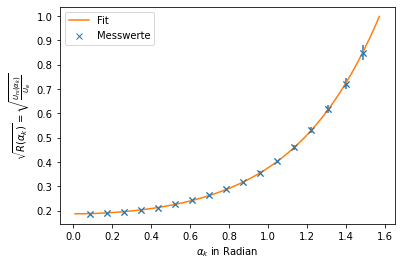

In [45]:
#Fit von n2 des Prismas für senkrecht polarisiertes Licht
plt.scatter(alpha,np.sqrt(U_s/4.4), label="Messwerte",marker='x',linewidths=1)
plt.errorbar(alpha,np.sqrt(U_s/4.4), yerr=u_Us,fmt='o',marker='x')
fit_parameters_1, fit_cov = curve_fit(U_rs,alpha,U_s/4.4, p0 = 1.43)
fit_uncertainties = fit_cov[0,0]**0.5
plt.plot(alpha_test,np.sqrt(U_rs(alpha_test,*fit_parameters_1)), label="Fit")
plt.xlabel(r'$\alpha _k$'" in Radian")
plt.ylabel(r'$\sqrt{R(\alpha _k)} =  \sqrt{\frac{U_{rs}(\alpha _k)}{U_e}}$')
plt.legend(loc="upper left")
plt.savefig("FitU_s.pdf")
print("n2 =", fit_parameters_1[0], "+/-", fit_uncertainties)

R^2 = 0.9999910151673195


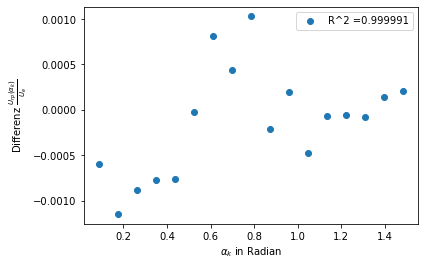

In [51]:
y = np.sqrt(U_s/4.4)
x = alpha
residuals = y - np.sqrt(U_rs(x,*fit_parameters_1))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)
plt.scatter(x,residuals, label='R^2 ='+str(np.round(R_2,7)))
plt.xlabel(r'$\alpha _k$'" in Radian")
plt.ylabel("Differenz "r'$y- \sqrt{\frac{U_{rs}(\alpha _k)}{U_e}}$')
plt.legend(loc="upper right")
#plt.rcParams["figure.figsize"] = (8,1)
#plt.savefig("DispersionRes.pdf", bbox_inches = "tight")
print("R^2 =", R_2)

/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


n2 = 1.4585229459182563 +/- 0.0011286186625345184


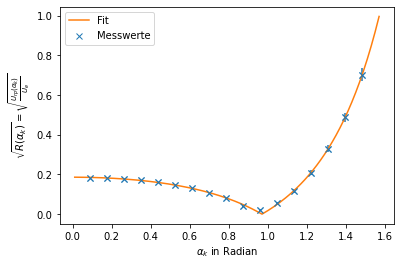

In [47]:
#Fit von n2 des Prismas für parallel polarisiertes Licht
plt.scatter(alpha,np.sqrt(U_p/4.4), label="Messwerte", marker='x',linewidths=1)
plt.errorbar(alpha,np.sqrt(U_p/4.4), yerr=u_Us,fmt='o',marker='x')
fit_parameters_2, fit_cov = curve_fit(U_rp,alpha,U_p/4.4, p0 = 1.43)
fit_uncertainties = fit_cov[0,0]**0.5
plt.plot(alpha_test,np.sqrt(U_rp(alpha_test,*fit_parameters_2)), label="Fit")
plt.xlabel(r'$\alpha _k$'" in Radian")
plt.ylabel(r'$\sqrt{R(\alpha _k)} =  \sqrt{\frac{U_{rp}(\alpha _k)}{U_e}}$')
plt.legend(loc="upper left")
plt.savefig("FitU_p.pdf")
print("n2 =", fit_parameters_2[0], "+/-", fit_uncertainties)

R^2 = 0.9993235927315005


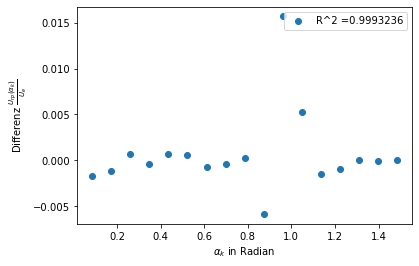

In [52]:
y = np.sqrt(U_p/4.4)
x = alpha
residuals = y - np.sqrt(U_rp(x,*fit_parameters_1))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)
plt.scatter(x,residuals, label='R^2 ='+str(np.round(R_2,7)))
plt.xlabel(r'$\alpha _k$'" in Radian")
plt.ylabel("Differenz "r'$y- \sqrt{\frac{U_{rp}(\alpha _k)}{U_e}}$')
plt.legend(loc="upper right")
#plt.rcParams["figure.figsize"] = (8,1)
#plt.savefig("DispersionRes.pdf", bbox_inches = "tight")
print("R^2 =", R_2)

/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


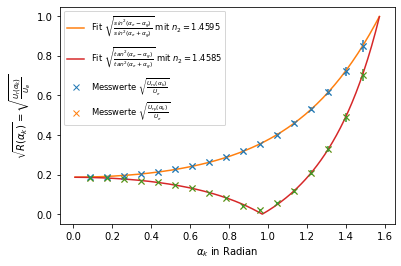

In [49]:
#Gemeinsames Fit
#senkrecht Polarisiertes Licht
plt.scatter(alpha,np.sqrt(U_s/4.4), label="Messwerte "r'$\sqrt{\frac{U_{rs}(\alpha _k)}{U_e}}$',marker='x',linewidths=1)
plt.errorbar(alpha,np.sqrt(U_s/4.4), yerr=u_Us,fmt='o',marker='x')
plt.plot(alpha_test,np.sqrt(U_rs(alpha_test,*fit_parameters_1)), label="Fit "r'$ \sqrt{\frac{sin^2(\alpha _e - \alpha _g)}{sin^2(\alpha _e + \alpha _g)}}$'" mit "r'$n_2 = 1.4595$')
#Parallel Polarisiertes Licht
plt.scatter(alpha,np.sqrt(U_p/4.4), label="Messwerte "r'$\sqrt{\frac{U_{rp}(\alpha _k)}{U_e}}$', marker='x',linewidths=1)
plt.errorbar(alpha,np.sqrt(U_p/4.4), yerr=u_Us,fmt='o',marker='x')
plt.plot(alpha_test,np.sqrt(U_rp(alpha_test,*fit_parameters_2)), label="Fit "r'$ \sqrt{\frac{tan^2(\alpha _e - \alpha _g)}{tan^2(\alpha _e + \alpha _g)}}$'" mit "r'$n_2 = 1.4585$')
#Plot-Einstellungen
plt.xlabel(r'$\alpha _k$'" in Radian")
plt.ylabel(r'$\sqrt{R(\alpha _k)} =  \sqrt{\frac{U_{r}(\alpha _k)}{U_e}}$')
plt.legend(loc="upper left", fontsize = "small")
plt.savefig("FitU_g.pdf")

R^2 = 0.9993235927315005


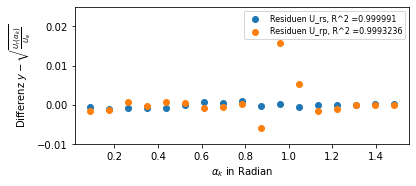

In [72]:
#Residuen senkrechte polarisation
y = np.sqrt(U_s/4.4)
x = alpha
residuals = y - np.sqrt(U_rs(x,*fit_parameters_1))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)
plt.scatter(x,residuals, label='Residuen U_rs, R^2 ='+str(np.round(R_2,7)))
#Residuen parallele polarisation
y = np.sqrt(U_p/4.4)
x = alpha
residuals = y - np.sqrt(U_rp(x,*fit_parameters_1))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)
plt.scatter(x,residuals, label='Residuen U_rp, R^2 ='+str(np.round(R_2,7)))
plt.xlabel(r'$\alpha _k$'" in Radian")
plt.ylabel("Differenz "r'$y- \sqrt{\frac{U_{r}(\alpha _k)}{U_e}}$')
plt.ylim(-0.01, 0.025)
plt.legend(loc="upper right", prop={'size': 8})
plt.gca().set_aspect(aspect=18)
#plt.rcParams["figure.figsize"] = (8,1)
plt.savefig("Residuen.pdf", bbox_inches = "tight")
print("R^2 =", R_2)

In [50]:
#Der Brewster-Winkel ist dann
alpha_b = np.arctan(1.459/1.00028)*360/(2*np.pi)
print(alpha_b)

55.56574261730882
